<a href="https://colab.research.google.com/github/leticiaram/Modelos_Estocasticos_2023/blob/main/Codigo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulación de Proceso Poisson

In [1]:
# El siguiente código está basado en el código de  @sachinsdate
# https://gist.github.com/sachinsdate/d98b3a923aaa9055f19e4b5e820e1a14
import random
import math
import statistics
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sim_Poisson_Process(par_lambda, num_events):
  event_num = []
  inter_event_times = []
  event_times = []
  event_time = 0

  for i in range(num_events):
	  event_num.append(i)
	  #Get a random probability value from the uniform distribution's PDF
	  unif = random.random()

	  #Generate the inter-event time from the exponential distribution's CDF using the Inverse-CDF technique
	  inter_event_time = -math.log(1.0 - unif) / par_lambda
	  inter_event_times.append(inter_event_time)

	  #Add the inter-event time to the running sum to get the next absolute event time
	  event_time = event_time + inter_event_time
	  event_times.append(event_time)

  return(event_num, inter_event_times, event_times)

In [3]:
random.seed(10)
num_events =10
event_num, inter_event_times, event_times = sim_Poisson_Process(par_lambda=20, num_events=num_events)

In [4]:
event_times

[0.04236186249169292,
 0.0703704518995106,
 0.11351876898716647,
 0.12505854615959336,
 0.20897684921679915,
 0.2957237520429392,
 0.34871341185559857,
 0.35744474715874924,
 0.39421297953619905,
 0.4140709254187563]

### Conteos $\{N(t),t\in[0,t]\}$

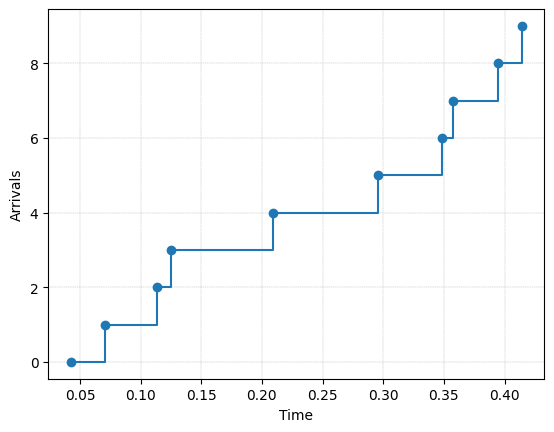

In [ ]:
plt.step(np.array(event_times, dtype=np.float32), np.array(event_num, dtype=np.float32), where='post')
plt.plot(np.array(event_times, dtype=np.float32), np.array(event_num, dtype=np.float32), 'C0o', alpha=1)
plt.grid(linestyle = '--', linewidth = 0.3)
plt.xlabel('Time')
plt.ylabel('Arrivals')
plt.show()

## Tiempos de espera $\{W_i\}$

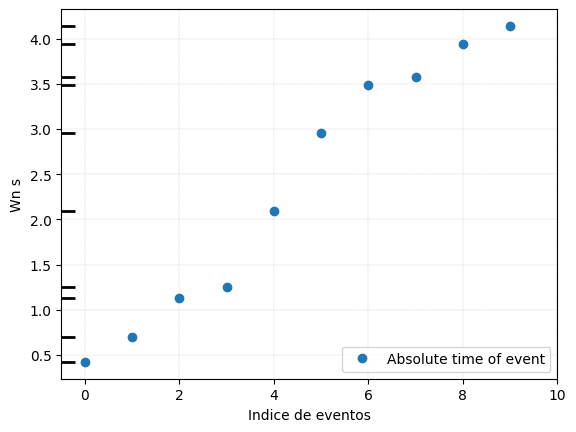

In [ ]:
fig, ax = plt.subplots(1, 1)
#plot the absolute event times
#fig = plt.figure()
#fig.suptitle('Absolute times of consecutive events in a simulated Poisson process')
plot, = plt.plot(event_num, event_times, 'o', label='Absolute time of event')
#ax.hlines(event_times, 0, event_num, colors='b', lw=3, alpha=0.5)
ax.hlines(event_times, -1, -0.2, colors='0', lw=2, alpha=1)
plt.legend(handles=[plot], loc='lower right')
plt.grid(linestyle = '--', linewidth = 0.2)
plt.xlim([-0.5, num_events])
plt.xlabel('Indice de eventos')
plt.ylabel('Wn s')
plt.show()


## Tiempos entre eventos $\{T_i\}$

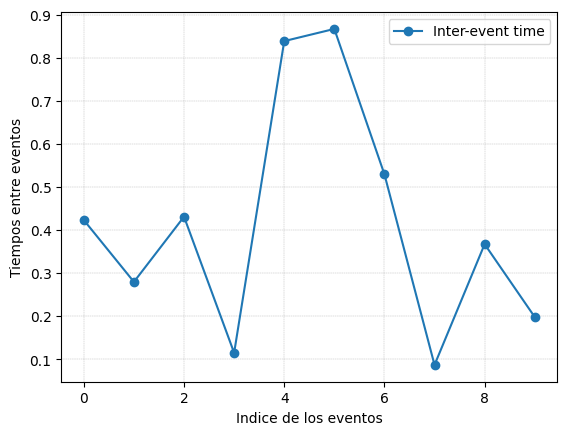

In [ ]:
#plot the inter-event times
fig = plt.figure()
#fig.suptitle('Times between consecutive events in a simulated Poisson process')
plot, = plt.plot(event_num, inter_event_times, 'o-', label='Inter-event time')
plt.grid(linestyle = '--', linewidth = 0.3)
plt.legend(handles=[plot])
plt.xlabel('Indice de los eventos')
plt.ylabel('Tiempos entre eventos')
plt.show()

# Distribución de tiempos para el m-ésimo arrivo

## Ejemplo para el 5to arrivo

In [18]:
random.seed(10)
tiempo_5to_arrivo = []
for i in range(1000):
  event_num, inter_event_times, event_times = sim_Poisson_Process(par_lambda=2, num_events=5)
  tiempo_5to_arrivo.append(event_times[4])

In [19]:
x = np.linspace(0.001, 7, 100)
from scipy.stats import gamma

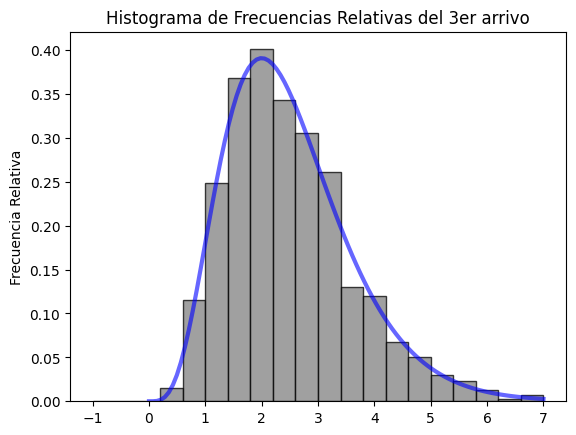

In [21]:
# Graficar el histograma y fdp
plt.plot(x, gamma.pdf(x,a=5,scale=1/2),'b-', lw=3, alpha=0.6, label='norm pdf')
plt.hist(tiempo_5to_arrivo, bins=20, range=(-1, 7), density=True, alpha=0.75, color='grey', edgecolor='black')
plt.xlabel('')
plt.ylabel('Frecuencia Relativa')
plt.title('Histograma de Frecuencias Relativas del 3er arrivo')
#plt.grid(True)
plt.show()

# Proceso Poisson con dos tipos de eventos


In [112]:
def sim_2Poisson_Process(par_lambda1,par_lambda2, num_events):
  event_num = []
  tipo = []
  inter_event_times = []
  event_times = []
  event_time = 0

  for i in range(num_events):
	  event_num.append(i)
	  #Get a random probability value from the uniform distribution's PDF
	  unif_0 = random.random()

	  #Generate the inter-event time from the exponential lambda1+lambda2, using the Inverse-CDF technique
	  inter_event_time = -math.log(1.0 - unif_0) / (par_lambda1 + par_lambda2)
	  inter_event_times.append(inter_event_time)

	  #Ahora identificamos que tipo de llegada fue la que tiene
	  unif_1 = random.random()
	  if unif_1 < par_lambda1/(par_lambda1+par_lambda2):
	    tipo.append(1)
	  else:
	    tipo.append(2)

	  #Add the inter-event time to the running sum to get the next absolute event time
	  event_time = event_time + inter_event_time
	  event_times.append(event_time)

  return(event_num, tipo, inter_event_times, event_times)

In [106]:
random.seed(10)
num_events =50
event_num, tipo, inter_event_times, event_times = sim_2Poisson_Process(par_lambda1 = 2,par_lambda2 = 4, num_events = num_events)

In [107]:
import pandas as pd
pd.Series(tipo).value_counts()

2    30
1    20
dtype: int64

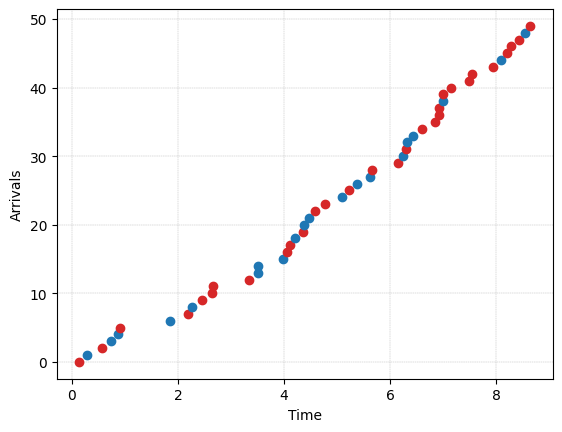

In [108]:
#plt.step(np.array(event_times, dtype=np.float32), np.array(event_num, dtype=np.float32), where='post')

for i in range(len(event_times)):
  if tipo[i]==1:
    plt.plot(np.array(event_times, dtype=np.float32)[i], np.array(event_num, dtype=np.float32)[i], 'C0o', alpha=1)
  else:
    plt.plot(np.array(event_times, dtype=np.float32)[i], np.array(event_num, dtype=np.float32)[i], 'C3o', alpha=1)

plt.grid(linestyle = '--', linewidth = 0.3)
plt.xlabel('Time')
plt.ylabel('Arrivals')
plt.show()

# Algoritmo Gillespie

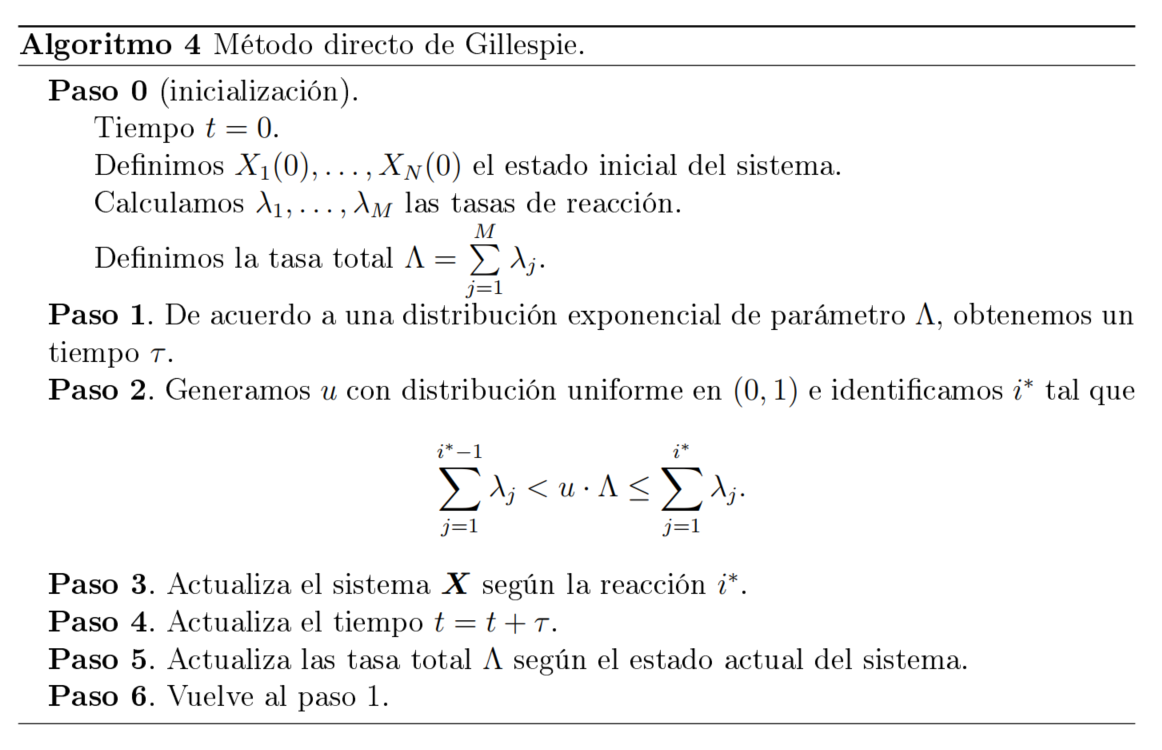

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import odeint

In [145]:
def Gillepie(S, I, R, tend, beta, gamma):
  t = [0]
  while t[-1] < tend and (S[-1] + I[-1] >= 1):

    N = S[-1] + I[-1] + R[-1]
    props = [beta*I[-1]*S[-1]/N, gamma*I[-1]]
    prop_sum = sum(props)
    tau = np.random.exponential(scale=1/prop_sum)
    t.append(t[-1]+tau)
    rand = random.uniform(0,1)

    # Susceptible becomes Infected
    if rand * prop_sum <= props[0]:
            S.append(S[-1] - 1)
            I.append(I[-1] + 1)
            R.append(R[-1])

    # Infected becomes Recovered
    # elif rand * prop_sum > props[0] and rand * prop_sum <= sum(props[:2]):
    else:
            S.append(S[-1])
            I.append(I[-1] - 1)
            R.append(R[-1] + 1)
  return(t, S, I, R)

In [146]:
S = [100]
I = [1]
R = [0]
tend = 500
beta = 0.04
gamma = 0.01

random.seed(10)
tr, Sr, Ir, Rr = Gillepie(S, I, R, tend, beta, gamma)

Text(0.5, 0, 'Time')

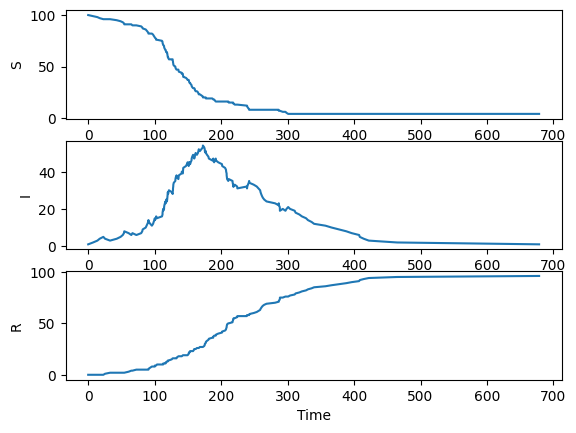

In [147]:
f,(ax1,ax2,ax3) = plt.subplots(3)

line1, = ax1.plot(tr,Sr) # S
line2, = ax2.plot(tr,Ir) # I
line3, = ax3.plot(tr,Rr) # R

ax1.set_ylabel("S")
ax2.set_ylabel("I")
ax3.set_ylabel("R")
ax3.set_xlabel("Time")

# plt.show()

In [148]:
t = np.linspace(0,tend, num=1000)
params = [beta,gamma]
y0 = [100, 1, 0]

def odesim(variables, t, params):
    S = variables[0]
    I = variables[1]
    R = variables[2]

    N = S + I + R

    beta = params[0]
    gamma = params[1]

    dSdt = -beta * I * S / N
    dIdt = beta * I * S / N - gamma * I
    dRdt = gamma * I

    return([dSdt, dIdt, dRdt])

y = odeint(odesim, y0, t, args=(params,))


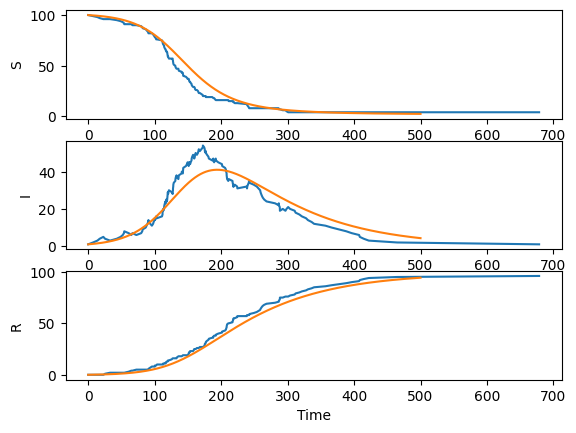

In [149]:
f,(ax1,ax2,ax3) = plt.subplots(3)

line1, = ax1.plot(tr,Sr) # S
line2, = ax2.plot(tr,Ir) # I
line3, = ax3.plot(tr,Rr) # R

ax1.set_ylabel("S")
ax2.set_ylabel("I")
ax3.set_ylabel("R")
ax3.set_xlabel("Time")

line1, = ax1.plot(t,y[:,0]) # S
line2, = ax2.plot(t,y[:,1]) # I
line3, = ax3.plot(t,y[:,2]) # R

plt.show()

In [150]:
S = [100]
I = [1]
R = [0]
tend = 500
beta = 0.04
gamma = 0.01
random.seed(5)
tr2, Sr2, Ir2, Rr2 = Gillepie(S, I, R, tend, beta, gamma)

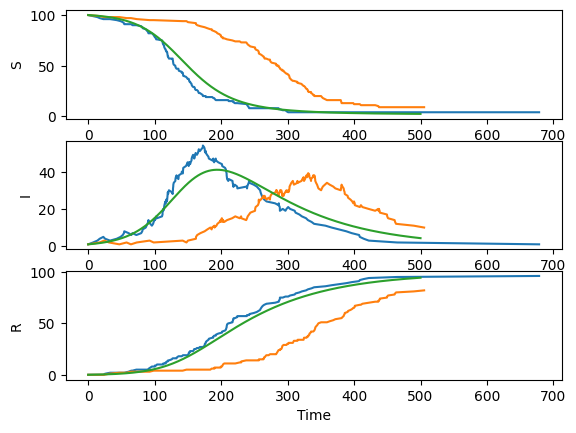

In [151]:
f,(ax1,ax2,ax3) = plt.subplots(3)

line1, = ax1.plot(tr,Sr) # S
line2, = ax2.plot(tr,Ir) # I
line3, = ax3.plot(tr,Rr) # R

ax1.set_ylabel("S")
ax2.set_ylabel("I")
ax3.set_ylabel("R")
ax3.set_xlabel("Time")

line1, = ax1.plot(tr2,Sr2) # S
line2, = ax2.plot(tr2,Ir2) # I
line3, = ax3.plot(tr2,Rr2) # R

line1, = ax1.plot(t,y[:,0]) # S
line2, = ax2.plot(t,y[:,1]) # I
line3, = ax3.plot(t,y[:,2]) # R

plt.show()